In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


## import data

In [2]:
data = pd.read_csv("Data/Sample - Superstore.csv", encoding='ISO-8859-1')

In [3]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
data.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9993,9994,CA-2017-119914,5/4/2017,5/9/2017,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,...,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


# * * * * * * * * * * * * Create profit prediction * * * * * * * * * * * *

# Create target column.

In [5]:
dfP = data[["Order Date", "Profit"]].copy()


In [6]:
dfP.head()

,Order Date,Profit
0,11/8/2016,41.9136
1,11/8/2016,219.5820
2,6/12/2016,6.8714
3,10/11/2015,-383.0310
4,10/11/2015,2.5164


<Axes: >

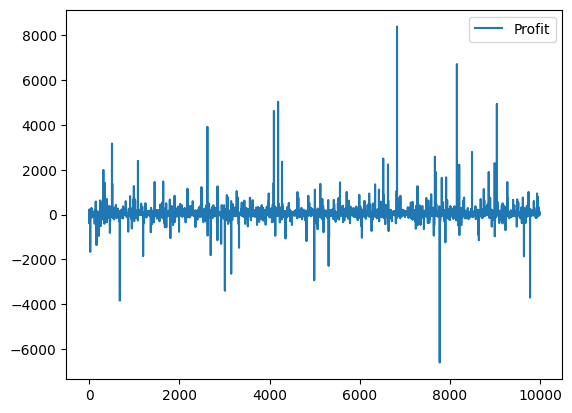

In [7]:
dfP.plot()

# Change column with prophet name

In [8]:
dfP.columns = ["ds","y"]

In [9]:
dfP.head()

,ds,y
0,11/8/2016,41.9136
1,11/8/2016,219.5820
2,6/12/2016,6.8714
3,10/11/2015,-383.0310
4,10/11/2015,2.5164


# Clean data.

<Axes: >

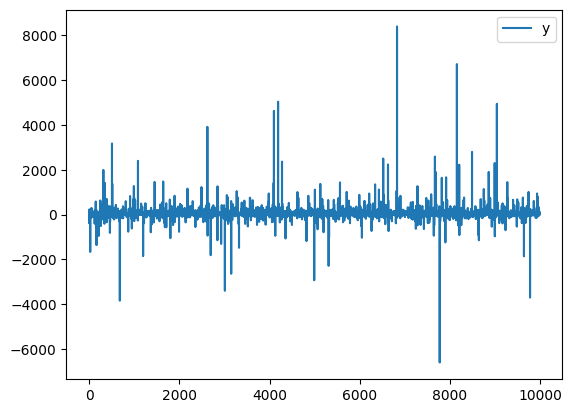

In [10]:
dfP.plot()

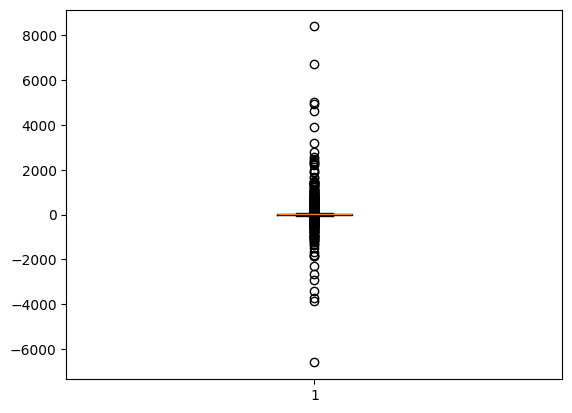

In [11]:
plt.boxplot(dfP["y"])
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x2673485d1d0>,
 'caps': [<matplotlib.lines.Line2D at 0x2673485f350>,
 'boxes': [<matplotlib.lines.Line2D at 0x26734861e90>],
 'medians': [<matplotlib.lines.Line2D at 0x2673485f3d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x26734868d90>],
 'means': []}

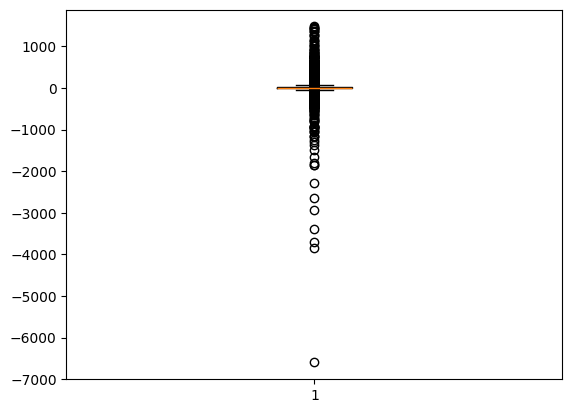

In [12]:
dfP = dfP[dfP["y"] < 1500]

plt.boxplot(dfP["y"])

{'whiskers': [<matplotlib.lines.Line2D at 0x26734678b90>,
 'caps': [<matplotlib.lines.Line2D at 0x26734679f50>,
 'boxes': [<matplotlib.lines.Line2D at 0x26734678350>],
 'medians': [<matplotlib.lines.Line2D at 0x2673467b0d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2673467ba90>],
 'means': []}

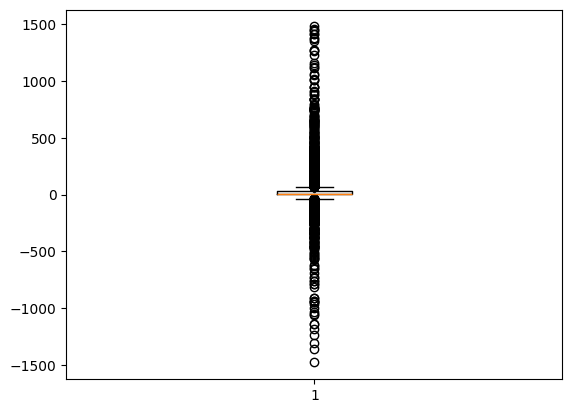

In [13]:
dfP = dfP[dfP["y"] > -1500]

plt.boxplot(dfP["y"])


<Axes: >

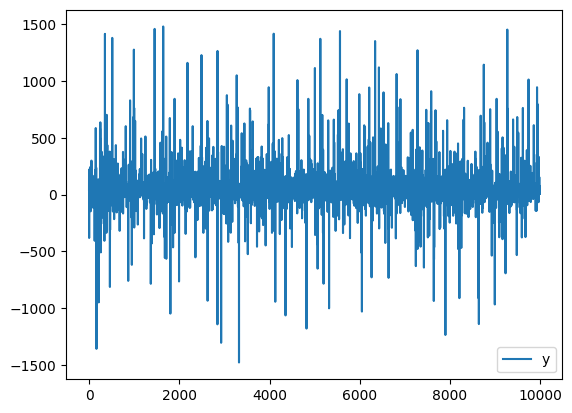

In [14]:
dfP.plot()

In [15]:
dfP.isnull().sum()

ds    0
y     0
dtype: int64

In [16]:
dfP.duplicated().sum()

np.int64(10)

# Change data format according to prophet

In [17]:
dfP["ds"] = pd.to_datetime(dfP["ds"])

In [18]:
# Assuming your DataFrame is named 'dfP'

dfP = dfP.groupby('ds')['y'].sum().reset_index()

In [19]:
dfP.head()

,ds,y
0,2014-01-03,5.5512
1,2014-01-04,-65.9901
2,2014-01-05,4.8840
3,2014-01-06,1358.0524
4,2014-01-07,-71.9621


In [20]:
dfP.tail()

,ds,y
1231,2017-12-26,61.1202
1232,2017-12-27,-31.9742
1233,2017-12-28,253.1188
1234,2017-12-29,644.4338
1235,2017-12-30,101.5365


# Create CSV file. Original data.

In [21]:
# dfP.to_csv('Sample-Superstore-Profit.csv', index=False)

# model import

In [22]:
holidays = pd.DataFrame({
    'holiday': 'special_event',
    'ds': pd.to_datetime(['2018-01-01', '2018-12-25']),
    'lower_window': 0,
    'upper_window': 1,
})

In [23]:
modelP = Prophet(holidays=holidays, yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)

modelP.add_seasonality(name='monthly', period=30.5, fourier_order=5)


In [24]:
dfP.columns

Index(['ds', 'y'], dtype='object')

In [25]:
modelP.fit(dfP)

18:34:00 - cmdstanpy - INFO - Chain [1] start processing
18:34:01 - cmdstanpy - INFO - Chain [1] done processing


In [26]:
future_dates = modelP.make_future_dataframe(periods=365)

In [27]:
future_dates.tail()

,ds
1596,2018-12-26
1597,2018-12-27
1598,2018-12-28
1599,2018-12-29
1600,2018-12-30


# Next 365 days Profit prediction, 2018.

In [28]:
predictionP = modelP.predict(future_dates)

In [29]:
predictionP.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,holidays,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-01-03,127.412720,-431.036561,610.982802,127.412720,127.412720,-36.836919,-36.836919,-36.836919,0.0,...,39.150064,39.150064,39.150064,-54.568433,-54.568433,-54.568433,0.0,0.0,0.0,90.575801
1,2014-01-04,127.502415,-462.171460,624.679457,127.502415,127.502415,-45.885745,-45.885745,-45.885745,0.0,...,0.047285,0.047285,0.047285,-63.591647,-63.591647,-63.591647,0.0,0.0,0.0,81.616670
2,2014-01-05,127.592110,-427.727036,645.544280,127.592110,127.592110,-20.338601,-20.338601,-20.338601,0.0,...,17.089169,17.089169,17.089169,-71.801880,-71.801880,-71.801880,0.0,0.0,0.0,107.253509
3,2014-01-06,127.681805,-400.532679,648.442267,127.681805,127.681805,-16.098158,-16.098158,-16.098158,0.0,...,50.713697,50.713697,50.713697,-79.118425,-79.118425,-79.118425,0.0,0.0,0.0,111.583647
4,2014-01-07,127.771500,-592.207689,447.356746,127.771500,127.771500,-183.930528,-183.930528,-183.930528,0.0,...,-66.889741,-66.889741,-66.889741,-85.474498,-85.474498,-85.474498,0.0,0.0,0.0,-56.159028


In [30]:
predictionP.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,holidays,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1596,2018-12-26,290.554025,-159.825333,847.298641,290.551134,290.556316,40.424586,40.424586,40.424586,0.0,...,-50.012500,-50.012500,-50.012500,36.959561,36.959561,36.959561,0.0,0.0,0.0,330.978611
1597,2018-12-27,290.643789,-157.909742,870.961964,290.640890,290.646093,75.140352,75.140352,75.140352,0.0,...,9.902026,9.902026,9.902026,25.421006,25.421006,25.421006,0.0,0.0,0.0,365.784142
1598,2018-12-28,290.733554,-223.714348,810.909197,290.730646,290.735869,44.810651,44.810651,44.810651,0.0,...,39.150064,39.150064,39.150064,13.753976,13.753976,13.753976,0.0,0.0,0.0,335.544205
1599,2018-12-29,290.823318,-313.771440,766.718640,290.820402,290.825638,-59.760708,-59.760708,-59.760708,0.0,...,0.047285,0.047285,0.047285,2.076862,2.076862,2.076862,0.0,0.0,0.0,231.062610
1600,2018-12-30,290.913083,-337.913136,763.372401,290.910158,290.915405,-72.301324,-72.301324,-72.301324,0.0,...,17.089169,17.089169,17.089169,-9.488439,-9.488439,-9.488439,0.0,0.0,0.0,218.611759


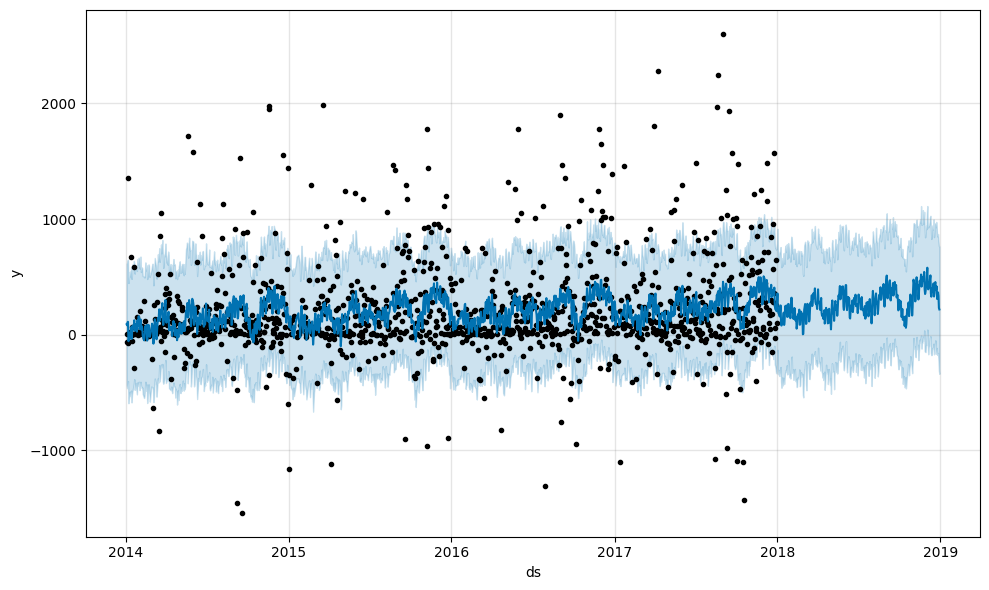

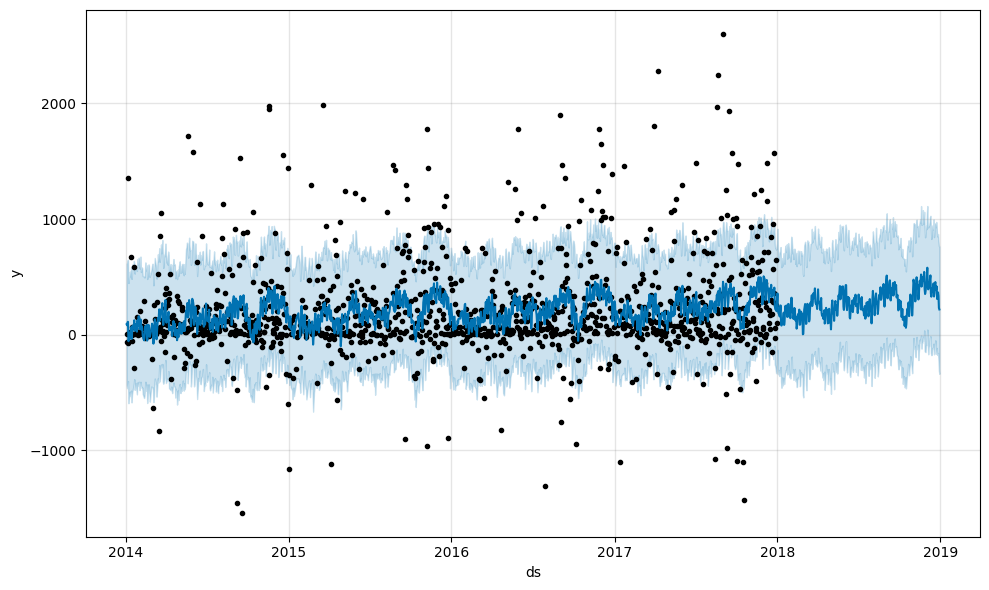

In [31]:
modelP.plot(predictionP)

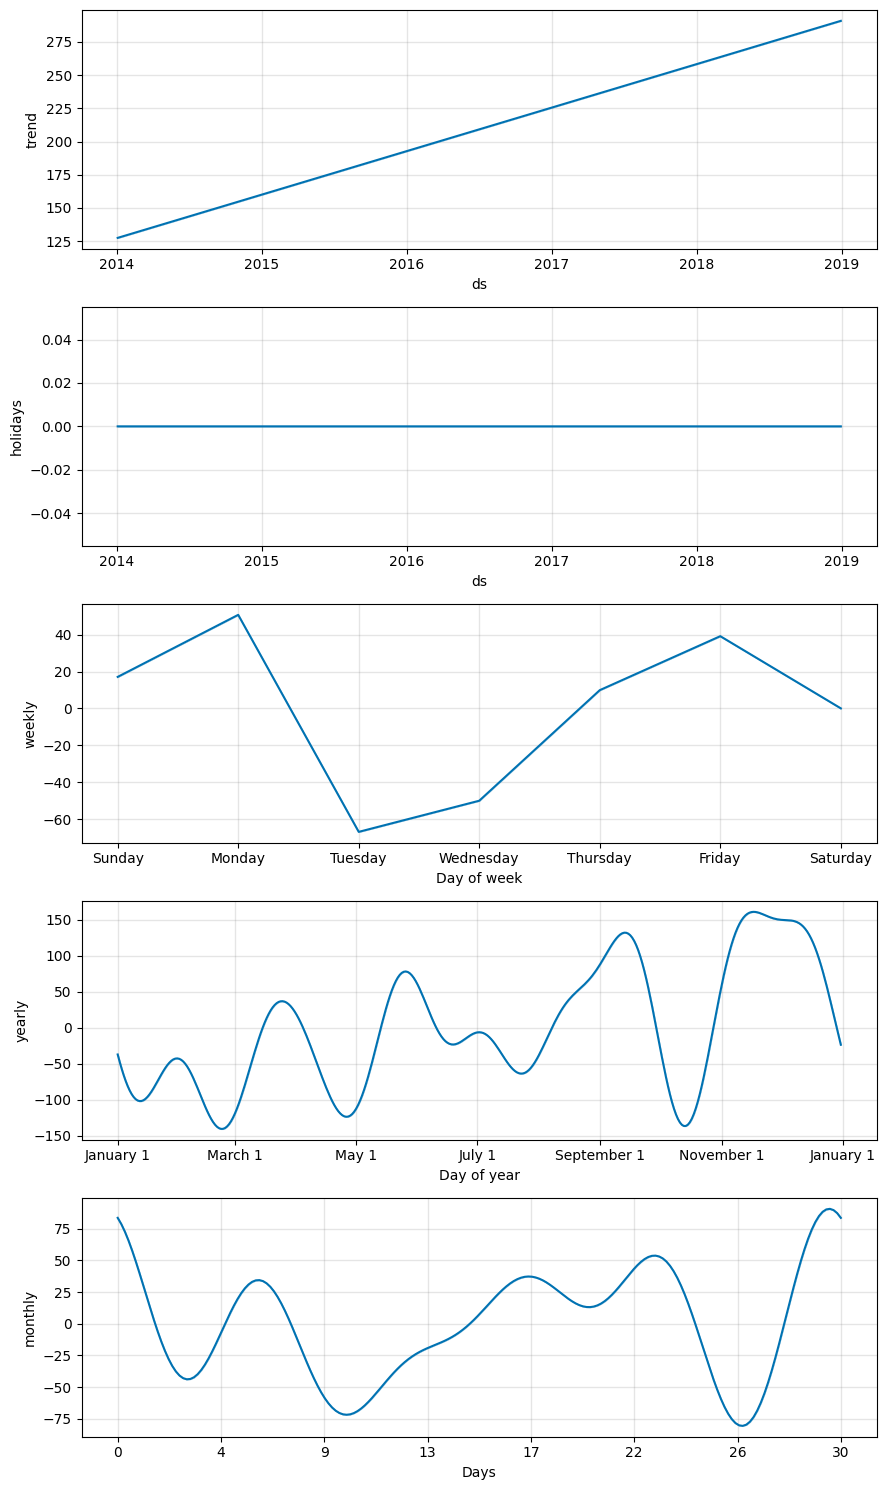

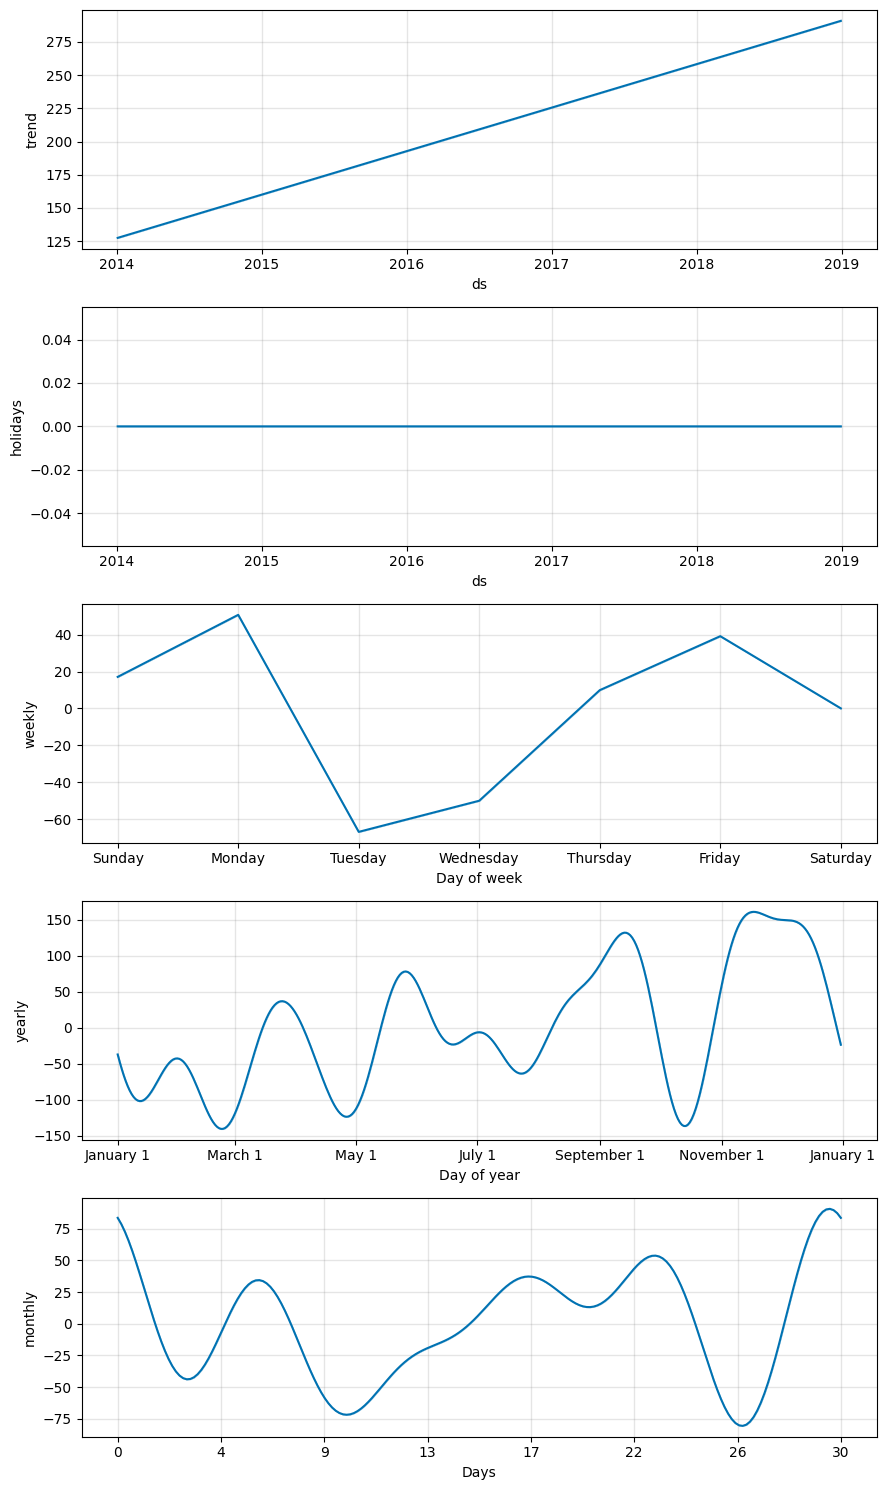

In [32]:
# Visualize each component.[Trad and Weekliy]
modelP.plot_components(predictionP)

# cross_validation

In [33]:
from prophet.diagnostics import cross_validation

df_cv = cross_validation(modelP, initial='730 days', period='180 days', horizon='365 days')

df_cv.tail()

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]18:34:02 - cmdstanpy - INFO - Chain [1] start processing
18:34:02 - cmdstanpy - INFO - Chain [1] done processing
 33%|████████████████████████████                                                        | 1/3 [00:00<00:00,  3.84it/s]18:34:02 - cmdstanpy - INFO - Chain [1] start processing
18:34:02 - cmdstanpy - INFO - Chain [1] done processing
 67%|████████████████████████████████████████████████████████                            | 2/3 [00:00<00:00,  3.94it/s]18:34:03 - cmdstanpy - INFO - Chain [1] start processing
18:34:03 - cmdstanpy - INFO - Chain [1] done processing
100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  3.84it/s]


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
953,2017-12-26,273.714396,-239.477554,752.179072,61.1202,2016-12-30
954,2017-12-27,242.705007,-233.859268,720.607456,-31.9742,2016-12-30
955,2017-12-28,208.228449,-259.356414,720.025229,253.1188,2016-12-30
956,2017-12-29,204.942170,-249.467271,693.714617,644.4338,2016-12-30
957,2017-12-30,180.087931,-296.001382,692.493766,101.5365,2016-12-30


In [34]:
from prophet.diagnostics import performance_metrics

df_p =performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,41 days,133484.694770,365.355573,241.107846,4.332774,1.082213,1.109888,0.842105
1,42 days,133479.720458,365.348766,242.148142,4.701224,1.098426,1.130606,0.842105
2,43 days,130808.317591,361.674325,237.353859,4.615303,1.098426,1.105505,0.847368
3,44 days,129826.035050,360.313801,236.226068,4.695351,1.098426,1.107557,0.852632
4,45 days,120530.872567,347.175564,226.958096,5.352856,1.277722,1.107201,0.873684


C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:548: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


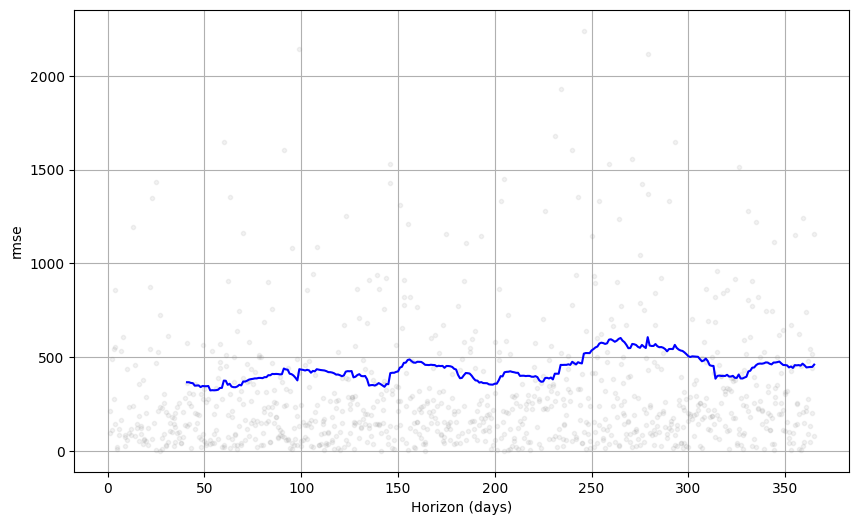

In [35]:
from prophet.plot import plot_cross_validation_metric

fig = plot_cross_validation_metric(df_cv , metric="rmse")

In [36]:
from prophet.diagnostics import cross_validation, performance_metrics

# Cross-validation
df_cv = cross_validation(modelP, initial='365 days', period='90 days', horizon='180 days')

# Performance metrics
df_p = performance_metrics(df_cv)

print("MAE:", df_p['mae'].mean())
print("RMSE:", df_p['rmse'].mean())
print("MAPE:", df_p['mape'].mean())

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|                                                                                           | 0/11 [00:00<?, ?it/s]18:34:03 - cmdstanpy - INFO - Chain [1] start processing
18:34:03 - cmdstanpy - INFO - Chain [1] done processing
  9%|███████▌                                                                           | 1/11 [00:00<00:02,  4.39it/s]18:34:03 - cmdstanpy - INFO - Chain [1] start processing
18:34:03 - cmdstanpy - INFO - Chain [1] done processing
 18%|███████████████                                                                    | 2/11 [00:00<00:01,  4.76it/s]18:34:04 - cmdstanpy - INFO - Chain [1] start processing
18:34:04 - cmdstanpy - INFO - Chain [1] done processing
 27%|██████████████████████▋                                                            | 3/11 [00:00<00:01,  4.88it/s]18:34:04 - cmdstanpy - INFO - Chain [1] start processing
18:34:04 - cmdstanpy - I

MAE: 299.85297212666205
RMSE: 437.1597973031906
MAPE: 13.116124450088767


# Predicted value CSV.

In [37]:
# predictionP.to_csv('Sample-Superstore-predicted-Profit.csv', index=False)

# murge sales and predicted sales

In [38]:
dfP_merged = dfP.merge(predictionP[['ds', 'yhat']], on='ds', how='left')


In [39]:
dfP_merged.tail()

,ds,y,yhat
1231,2017-12-26,61.1202,264.810802
1232,2017-12-27,-31.9742,222.285597
1233,2017-12-28,253.1188,216.817596
1234,2017-12-29,644.4338,216.477523
1235,2017-12-30,101.5365,203.401261


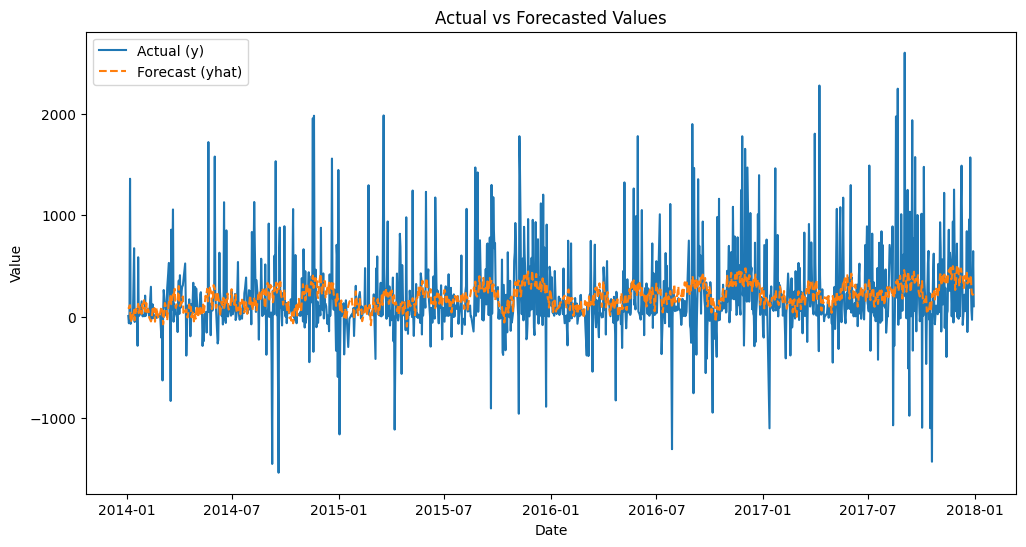

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(dfP_merged['ds'], dfP_merged['y'], label='Actual (y)')
plt.plot(dfP_merged['ds'], dfP_merged['yhat'], label='Forecast (yhat)', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs Forecasted Values')
plt.legend()
plt.show()


# * * * * * * * * * * * * Create sales prediction * * * * * * * * * * * *

# Create target column.

In [41]:
dfS = data[["Order Date", "Sales"]].copy()


<Axes: >

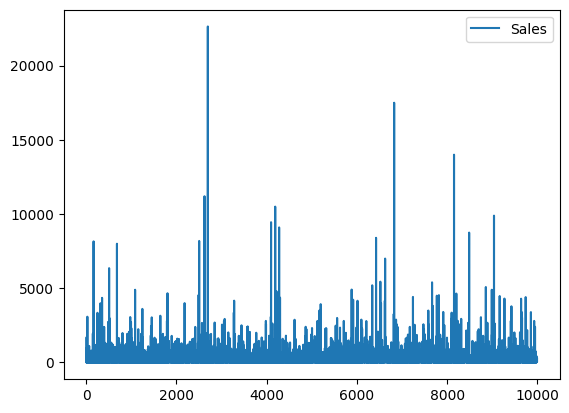

In [42]:
dfS.plot()

# Change column with prophet name

In [43]:
dfS.columns = ["ds","y"]

In [44]:
dfS.head()

,ds,y
0,11/8/2016,261.9600
1,11/8/2016,731.9400
2,6/12/2016,14.6200
3,10/11/2015,957.5775
4,10/11/2015,22.3680


# Clean data.

In [45]:
# dfS.plot()

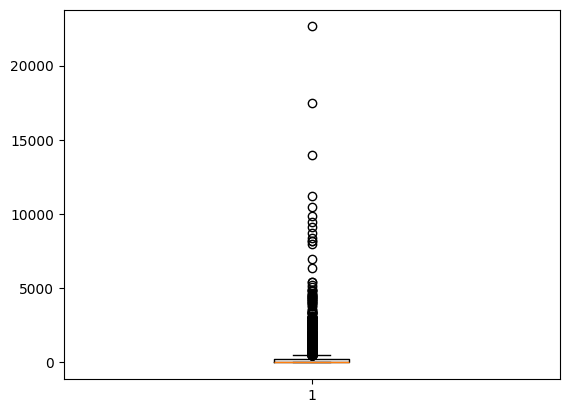

In [46]:
plt.boxplot(dfS["y"])
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x2673929ae90>,
 'caps': [<matplotlib.lines.Line2D at 0x267392997d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2673929aa90>],
 'medians': [<matplotlib.lines.Line2D at 0x2673929ba10>],
 'fliers': [<matplotlib.lines.Line2D at 0x267392f5210>],
 'means': []}

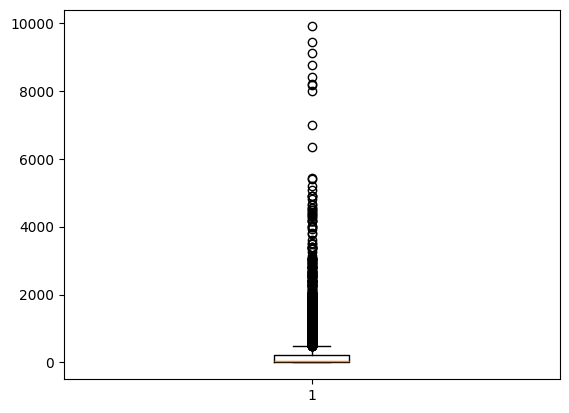

In [47]:
dfS = dfS[dfS["y"] < 10000]

plt.boxplot(dfS["y"])

<Axes: >

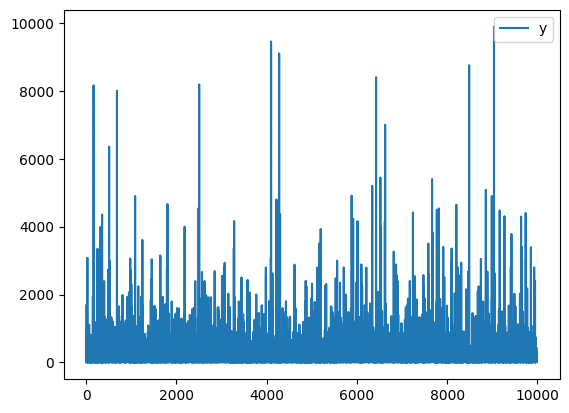

In [48]:
dfS.plot()

In [49]:
dfS.isnull().sum()

ds    0
y     0
dtype: int64

In [50]:
dfS.duplicated().sum()

np.int64(13)

# Change data format according to prophet


In [51]:
dfS["ds"] = pd.to_datetime(dfS["ds"])

In [52]:
dfS = dfS.groupby('ds')['y'].sum().reset_index()

In [53]:
dfS.head()

,ds,y
0,2014-01-03,16.448
1,2014-01-04,288.060
2,2014-01-05,19.536
3,2014-01-06,4407.100
4,2014-01-07,87.158


In [54]:
dfS.tail()

,ds,y
1232,2017-12-26,814.5940
1233,2017-12-27,177.6360
1234,2017-12-28,1657.3508
1235,2017-12-29,2915.5340
1236,2017-12-30,713.7900


# Create CSV file. Original data.


In [55]:
# dfS.to_csv('Sample-Superstore-Sales.csv', index=False)

# model import

In [56]:
holidays = pd.DataFrame({
    'holiday': 'special_event',
    'ds': pd.to_datetime(['2018-01-01', '2018-12-25']),
    'lower_window': 0,
    'upper_window': 1,
})

In [57]:
modelS = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)

modelS.add_seasonality(name='monthly', period=30.5, fourier_order=5)


In [58]:
dfS.columns

Index(['ds', 'y'], dtype='object')

In [59]:
modelS.fit(dfS)

18:34:07 - cmdstanpy - INFO - Chain [1] start processing
18:34:07 - cmdstanpy - INFO - Chain [1] done processing


In [60]:
future_dates = modelS.make_future_dataframe(periods=365)

In [61]:
future_dates.tail()

,ds
1597,2018-12-26
1598,2018-12-27
1599,2018-12-28
1600,2018-12-29
1601,2018-12-30


# Next 365 days Profit prediction, 2018.


In [62]:
predictionS = modelS.predict(future_dates)

In [63]:
predictionS.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,monthly,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-01-03,1262.266453,-1322.862834,3447.278324,1262.266453,1262.266453,-147.602778,-147.602778,-147.602778,-272.218083,...,428.577164,428.577164,428.577164,-303.961859,-303.961859,-303.961859,0.0,0.0,0.0,1114.663675
1,2014-01-04,1262.804772,-1529.994619,3293.283620,1262.804772,1262.804772,-484.954561,-484.954561,-484.954561,-164.140958,...,72.182837,72.182837,72.182837,-392.996440,-392.996440,-392.996440,0.0,0.0,0.0,777.850211
2,2014-01-05,1263.343091,-1523.737819,3302.688918,1263.343091,1263.343091,-403.189990,-403.189990,-403.189990,-38.727989,...,109.603283,109.603283,109.603283,-474.065284,-474.065284,-474.065284,0.0,0.0,0.0,860.153100
3,2014-01-06,1263.881410,-1035.796837,3692.296649,1263.881410,1263.881410,-69.710213,-69.710213,-69.710213,6.678146,...,469.829352,469.829352,469.829352,-546.217711,-546.217711,-546.217711,0.0,0.0,0.0,1194.171196
4,2014-01-07,1264.419729,-2153.463629,2693.129294,1264.419729,1264.419729,-867.387804,-867.387804,-867.387804,-28.361226,...,-230.339136,-230.339136,-230.339136,-608.687442,-608.687442,-608.687442,0.0,0.0,0.0,397.031925


In [64]:
# predictionS.tail()

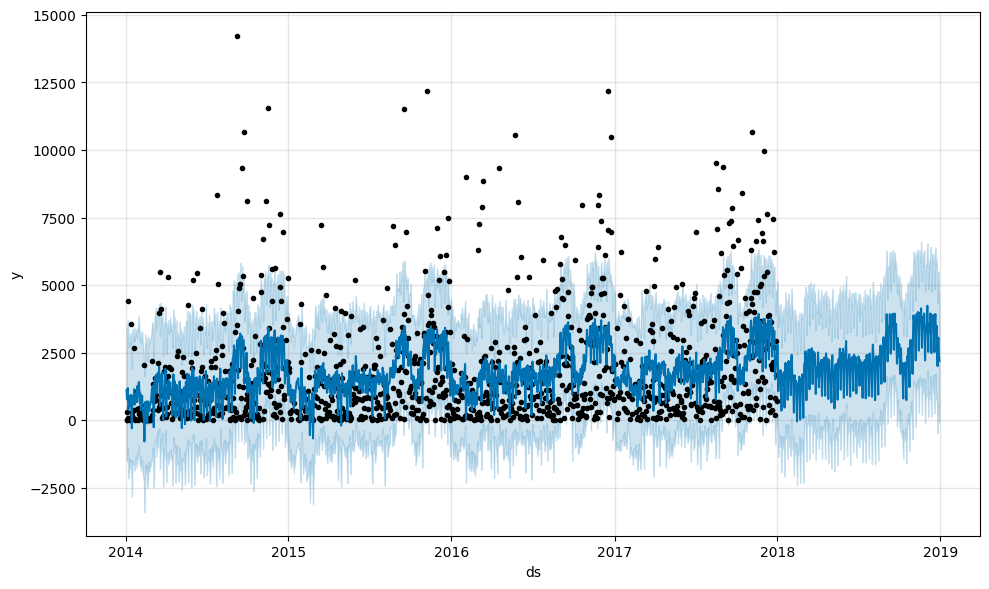

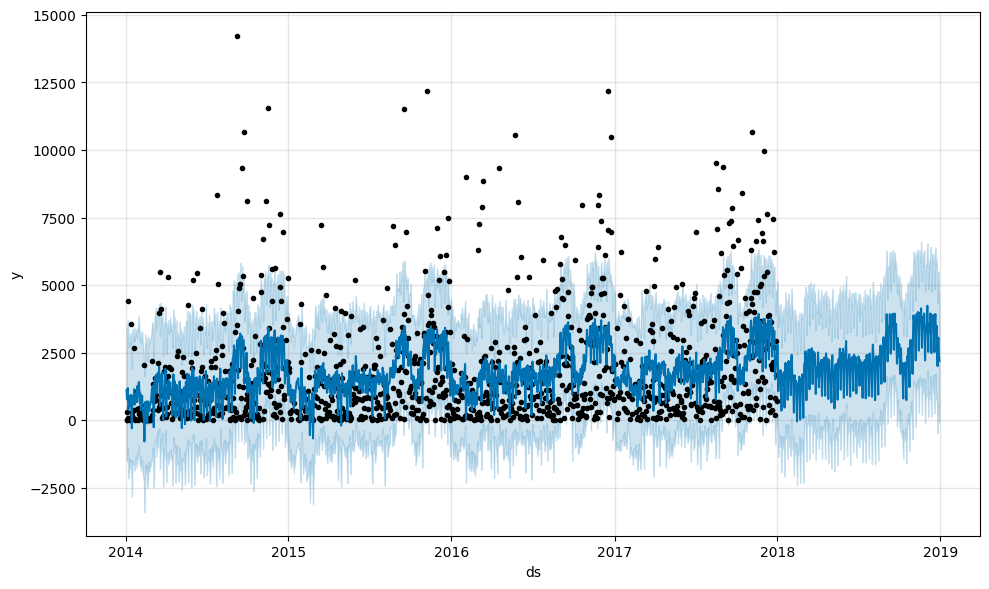

In [65]:
modelS.plot(predictionS)

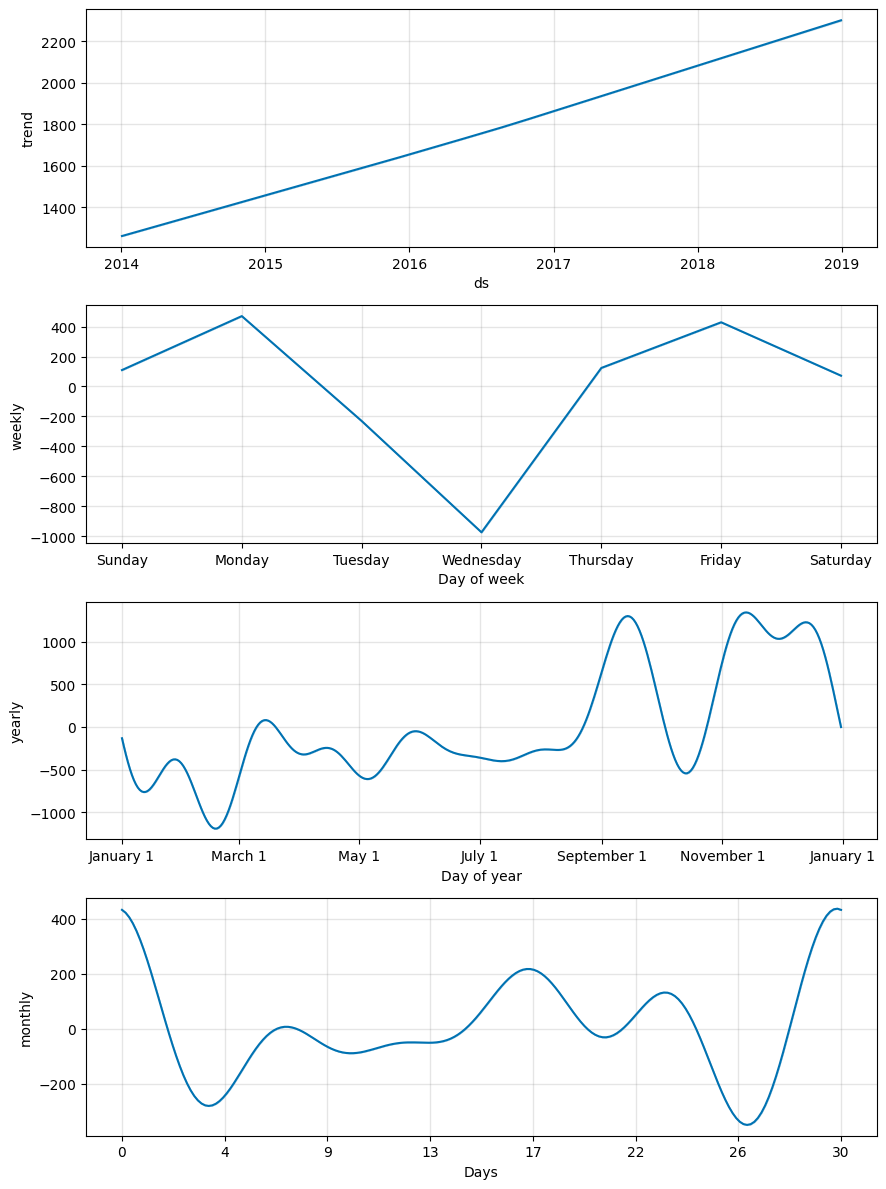

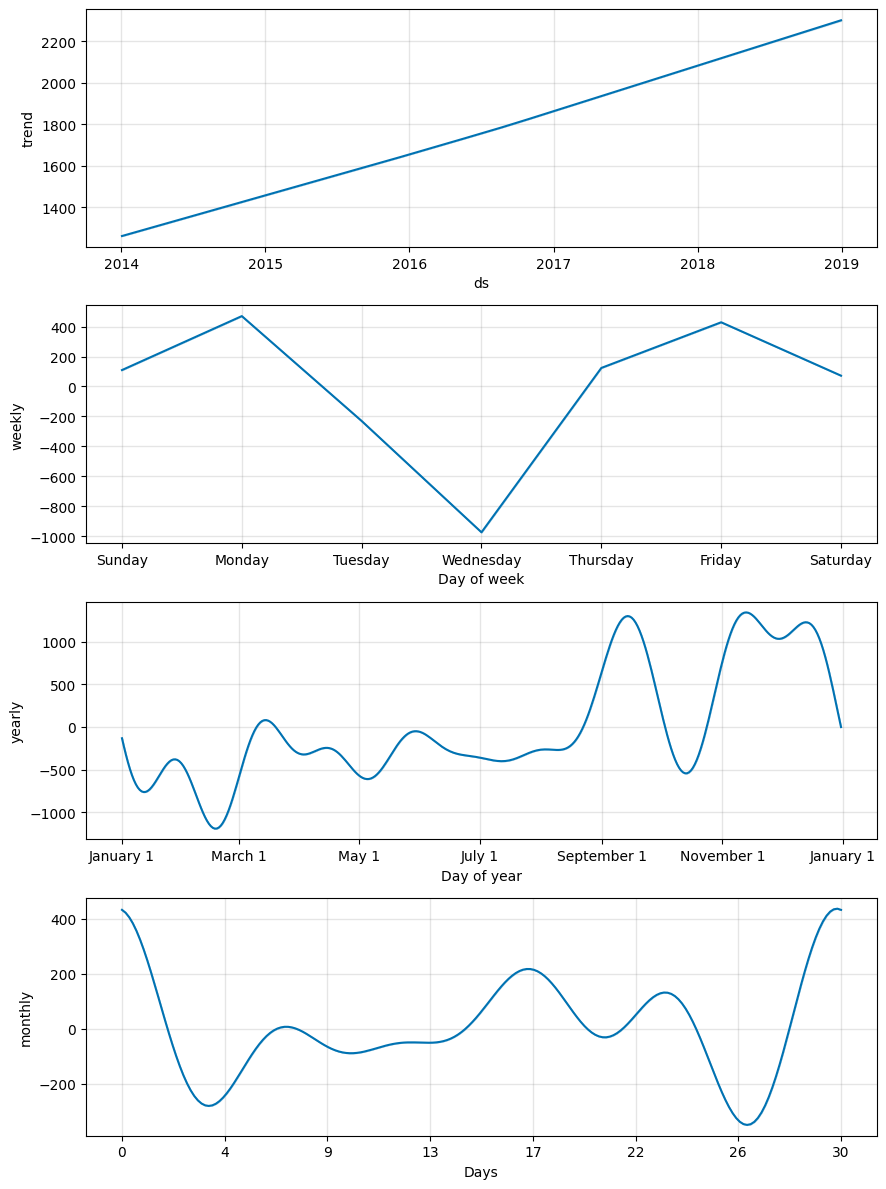

In [66]:
# Visualize each component.[Trad and Weekliy]
modelS.plot_components(predictionS)

# cross_validation

In [67]:
from prophet.diagnostics import cross_validation

df_cv = cross_validation(modelS, initial='730 days', period='180 days', horizon='365 days')

df_cv.tail()

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]18:34:09 - cmdstanpy - INFO - Chain [1] start processing
18:34:09 - cmdstanpy - INFO - Chain [1] done processing
 33%|████████████████████████████                                                        | 1/3 [00:00<00:01,  1.27it/s]18:34:09 - cmdstanpy - INFO - Chain [1] start processing
18:34:09 - cmdstanpy - INFO - Chain [1] done processing
 67%|████████████████████████████████████████████████████████                            | 2/3 [00:01<00:00,  2.15it/s]18:34:09 - cmdstanpy - INFO - Chain [1] start processing
18:34:09 - cmdstanpy - INFO - Chain [1] done processing
100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  2.32it/s]


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
953,2017-12-26,3001.829588,520.165407,5343.630768,814.5940,2016-12-30
954,2017-12-27,1973.097183,-218.472259,4356.486436,177.6360,2016-12-30
955,2017-12-28,2542.920555,266.008504,4934.666003,1657.3508,2016-12-30
956,2017-12-29,2507.468809,198.732077,4817.510404,2915.5340,2016-12-30
957,2017-12-30,1904.153101,-512.092942,4107.699710,713.7900,2016-12-30


In [68]:
from prophet.diagnostics import performance_metrics

df_p =performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,41 days,2.428942e+06,1558.506454,1079.820748,2.852055,0.783803,0.855078,0.894737
1,42 days,2.421033e+06,1555.966814,1079.015928,2.834644,0.773425,0.860139,0.894737
2,43 days,2.416955e+06,1554.655981,1075.436611,2.784238,0.773425,0.854813,0.894737
3,44 days,2.436306e+06,1560.867226,1086.202188,2.854849,0.783803,0.868884,0.894737
4,45 days,2.344321e+06,1531.117656,1060.815207,3.316431,0.804447,0.879703,0.905263


C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:548: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


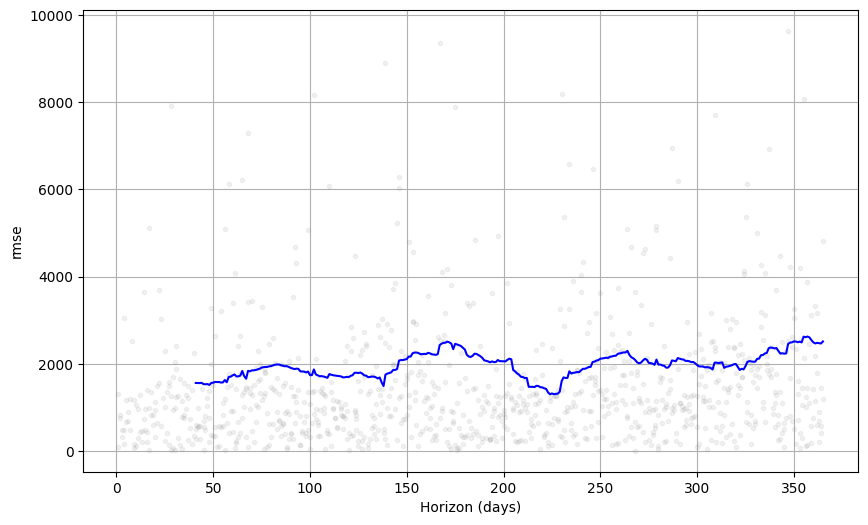

In [69]:
from prophet.plot import plot_cross_validation_metric

fig = plot_cross_validation_metric(df_cv , metric="rmse")

In [70]:
# Cross-validation
df_cv = cross_validation(modelS, initial='365 days', period='90 days', horizon='180 days')

# Performance metrics
df_p = performance_metrics(df_cv)

print("MAE:", df_p['mae'].mean())
print("RMSE:", df_p['rmse'].mean())
print("MAPE:", df_p['mape'].mean())

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|                                                                                           | 0/11 [00:00<?, ?it/s]18:34:10 - cmdstanpy - INFO - Chain [1] start processing
18:34:10 - cmdstanpy - INFO - Chain [1] done processing
  9%|███████▌                                                                           | 1/11 [00:00<00:02,  4.40it/s]18:34:10 - cmdstanpy - INFO - Chain [1] start processing
18:34:10 - cmdstanpy - INFO - Chain [1] done processing
 18%|███████████████                                                                    | 2/11 [00:00<00:02,  4.08it/s]18:34:10 - cmdstanpy - INFO - Chain [1] start processing
18:34:10 - cmdstanpy - INFO - Chain [1] done processing
 27%|██████████████████████▋                                                            | 3/11 [00:00<00:02,  3.52it/s]18:34:11 - cmdstanpy - INFO - Chain [1] start processing
18:34:11 - cmdstanpy - I

MAE: 1404.0887354781669
RMSE: 1951.9751976325056
MAPE: 6.915926399320489


# Predicted value CSV.

In [71]:
# predictionS.to_csv('Sample-Superstore-predicted-Sales.csv', index=False)

# murge sales and predicted sales

In [72]:
dfS_merged = dfS.merge(predictionS[['ds', 'yhat']], on='ds', how='left')


In [73]:
dfS_merged.tail()

,ds,y,yhat
1232,2017-12-26,814.5940,2504.376723
1233,2017-12-27,177.6360,1512.008780
1234,2017-12-28,1657.3508,2289.917942
1235,2017-12-29,2915.5340,2377.263225
1236,2017-12-30,713.7900,2027.044445


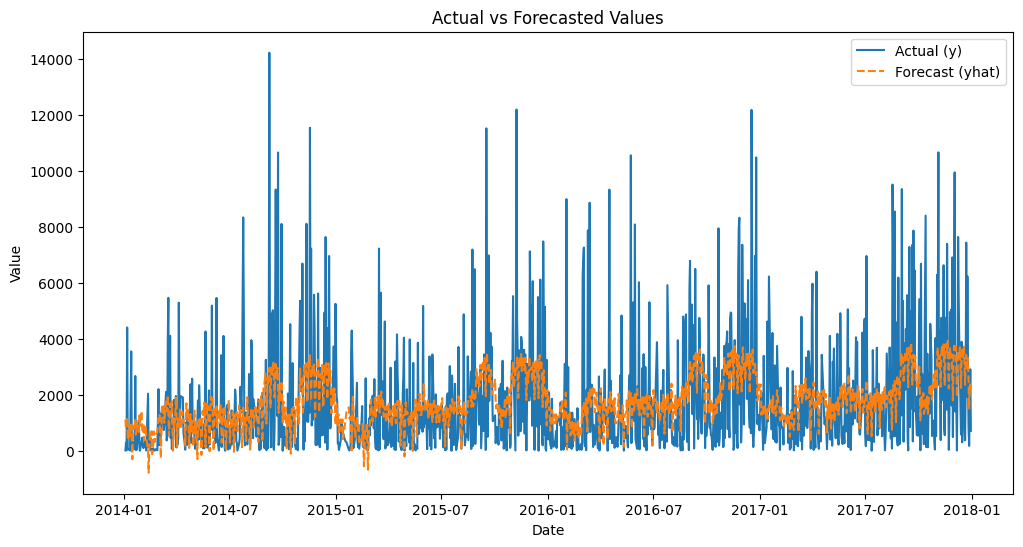

In [74]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(dfS_merged['ds'], dfS_merged['y'], label='Actual (y)')
plt.plot(dfS_merged['ds'], dfS_merged['yhat'], label='Forecast (yhat)', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs Forecasted Values')
plt.legend()
plt.show()
